In [2]:
import pandas as pd
import cv2

In [3]:
import os

def count_images_in_folders(folder_path):
    # Initialize a dictionary to store the count of images in each folder
    image_counts = {}

    # List all subdirectories in the dataset path
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            # Count the number of files (images) in the subdirectory
            image_counts[subdir] = len(os.listdir(subdir_path))
    
    return image_counts

# Define the path to the dataset directory
dataset_path = 'data'

# Get the image counts
image_counts = count_images_in_folders(dataset_path)

# Print the image counts
for folder, count in image_counts.items():
    print(f'Folder: {folder}, Image Count: {count}')


Folder: drive, Image Count: 1224
Folder: legglance-flick, Image Count: 1120
Folder: pullshot, Image Count: 1260
Folder: sweep, Image Count: 1120


In [4]:
path='data'
# list down the folders
folders = os.listdir(path)
print(folders)

['drive', 'legglance-flick', 'pullshot', 'sweep']


In [5]:
# for dealing with images
import cv2
# create lists
images  = []
labels  = []
# for each folder
for folder in folders:
    # list down image names
    names=os.listdir(path+'/'+folder)
    # for each image
    for name in names:
        # read an image
        each_image = path + '/' + folder +  '/' + name
        img=cv2.imread(each_image)
        # append image to list
        images.append(img)
        # append folder name (type of shot) to list
        labels.append(folder)

KeyboardInterrupt: 

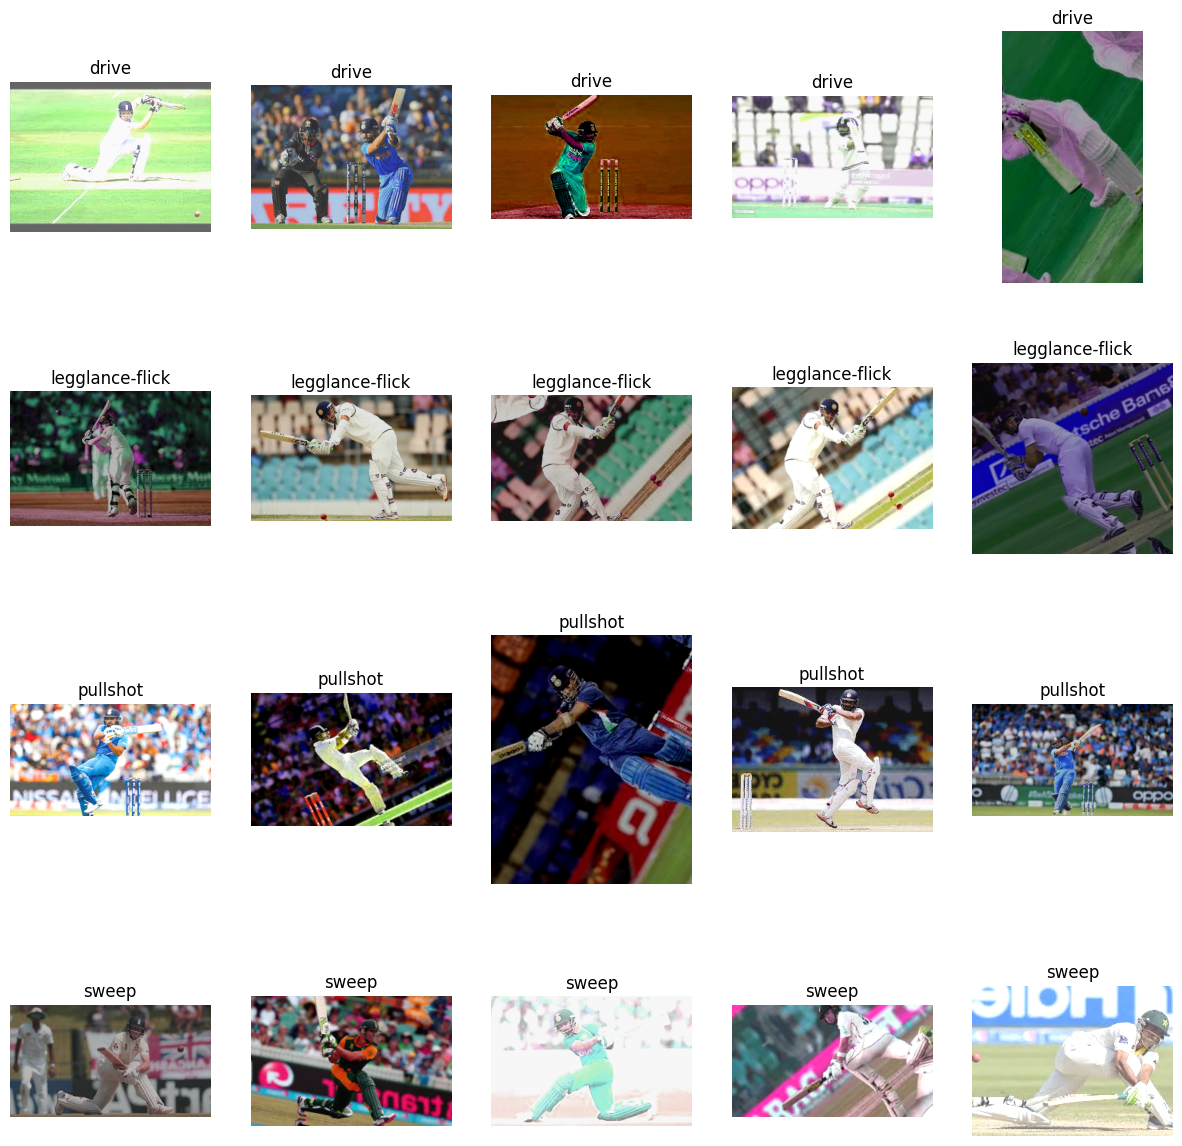

In [ ]:
# visualization library
import matplotlib.pyplot as plt
# for randomness
import random
# create subplots with 4 rows and 5 columns
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15,15))
# randomly display 5 images for each shot for each folder
for i in range(len(folders)):
    # read image names
    names=os.listdir(path+'/'+folders[i])
    # randomly select 5 image names
    names= random.sample(names, 5)
    # for each image
    for j in range(len(names)):
      # read an image
      img = cv2.imread(path+ '/' + folders[i]+ '/' +names[j])
      # convert BGR to RGB
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # display image
      ax[i, j].imshow(img)
      # set folder name as title
      ax[i, j].set_title(folders[i])
      # Turn off axis
      ax[i, j].axis('off')

In [ ]:
# image augmentation
aug_images=[]
aug_labels=[]
# for each image in training data
for idx in range(len(images)):
  # fetch an image and label
  img  = images[idx]
  label= labels[idx]
  # flip an image
  img_flip = cv2.flip(img, 1)
  # append augmented image to list
  aug_images.append(img_flip)
  # append label to list
  aug_labels.append(label)



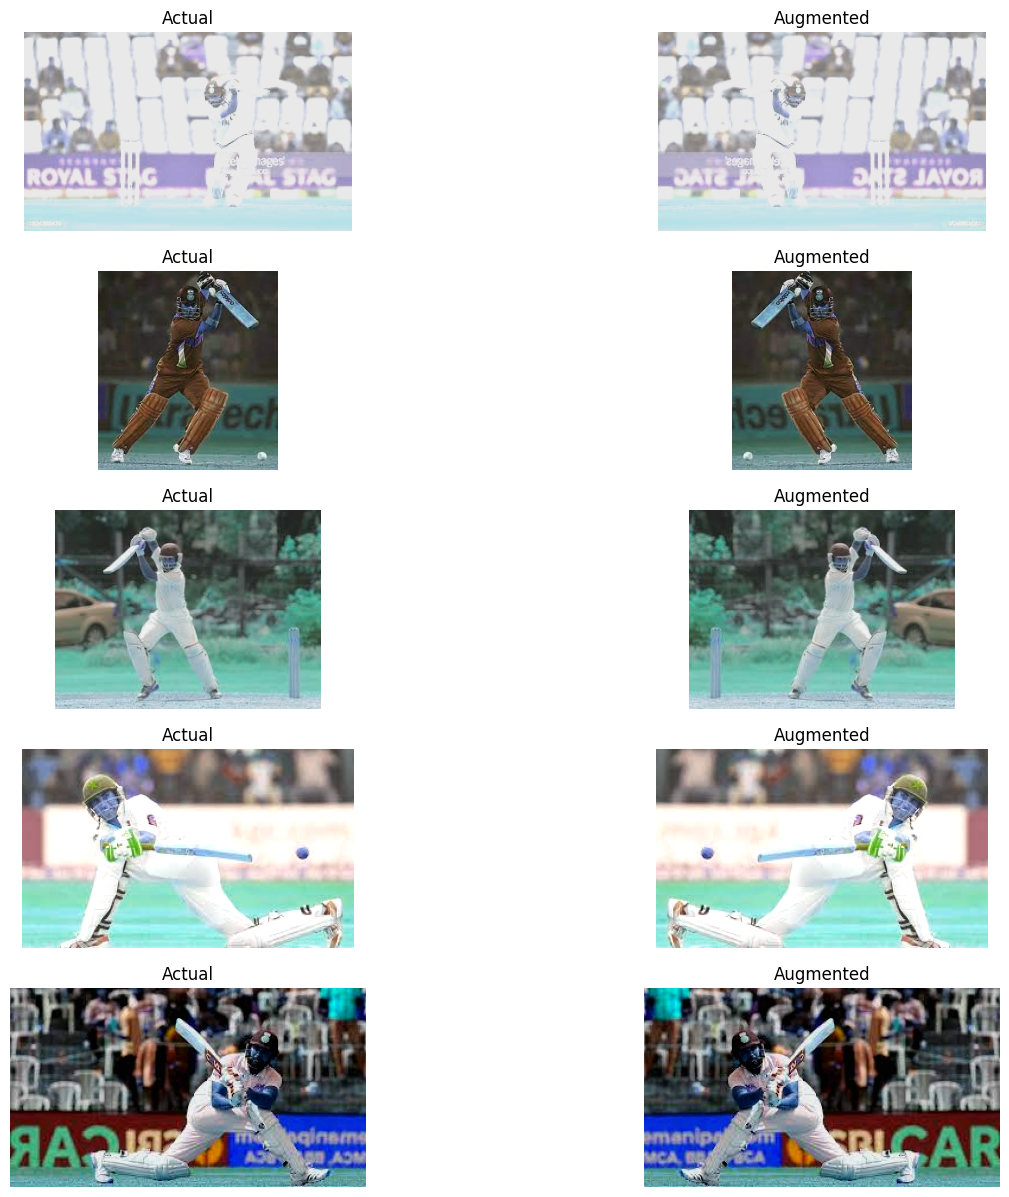

In [ ]:
# display actual and augmented image for sample images
# create indices
ind = range(len(aug_images))
# randomly sample indices
ind = random.sample(ind, 5)
# create subplots with 5 rows and 2 columns
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
# for each row
for row in range(5):
  # for each column
  for col in range(2):
    # first column for actual image
    if col==0:
      # display actual image
      ax[row, col].imshow(images[ ind[row] ] )
      # set title
      ax[row, col].set_title('Actual')
      # Turn off axis
      ax[row, col].axis('off')
    # second column for augmented image
    else:
      # display augmented image
      ax[row, col].imshow(aug_images[ ind[row] ] )
      # set title
      ax[row, col].set_title('Augmented')
      # Turn off axis
      ax[row, col].axis('off')

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
  (relu): ReLU()
)
Epoch [1/10], Step [1/119], Loss: 1.3949, ETA: 17.50 seconds
Epoch [1/10], Step [2/119], Loss: 2.3203, ETA: 18.90 seconds
Epoch [1/10], Step [3/119], Loss: 1.8933, ETA: 18.95 seconds
Epoch [1/10], Step [4/119], Loss: 1.7292, ETA: 19.18 seconds
Epoch [1/10], Step [5/119], Loss: 1.4106, ETA: 18.93 seconds
Epoch [1/10], Step [6/119], Loss: 1.3849, ETA: 18.44 seconds
Epoch [1/10], Step [7/119], Loss: 1.3919, ETA: 18.15 seconds
Epoch [1/10], Step [8/119], Loss: 1.4018, ETA: 18.23 seconds
Epoch [1/10], Step [9/119], Loss: 1.4013, ETA: 17.95 seconds
Epoch [1/10], Step [10/119], Loss: 1.3872, ETA: 17.71 secon

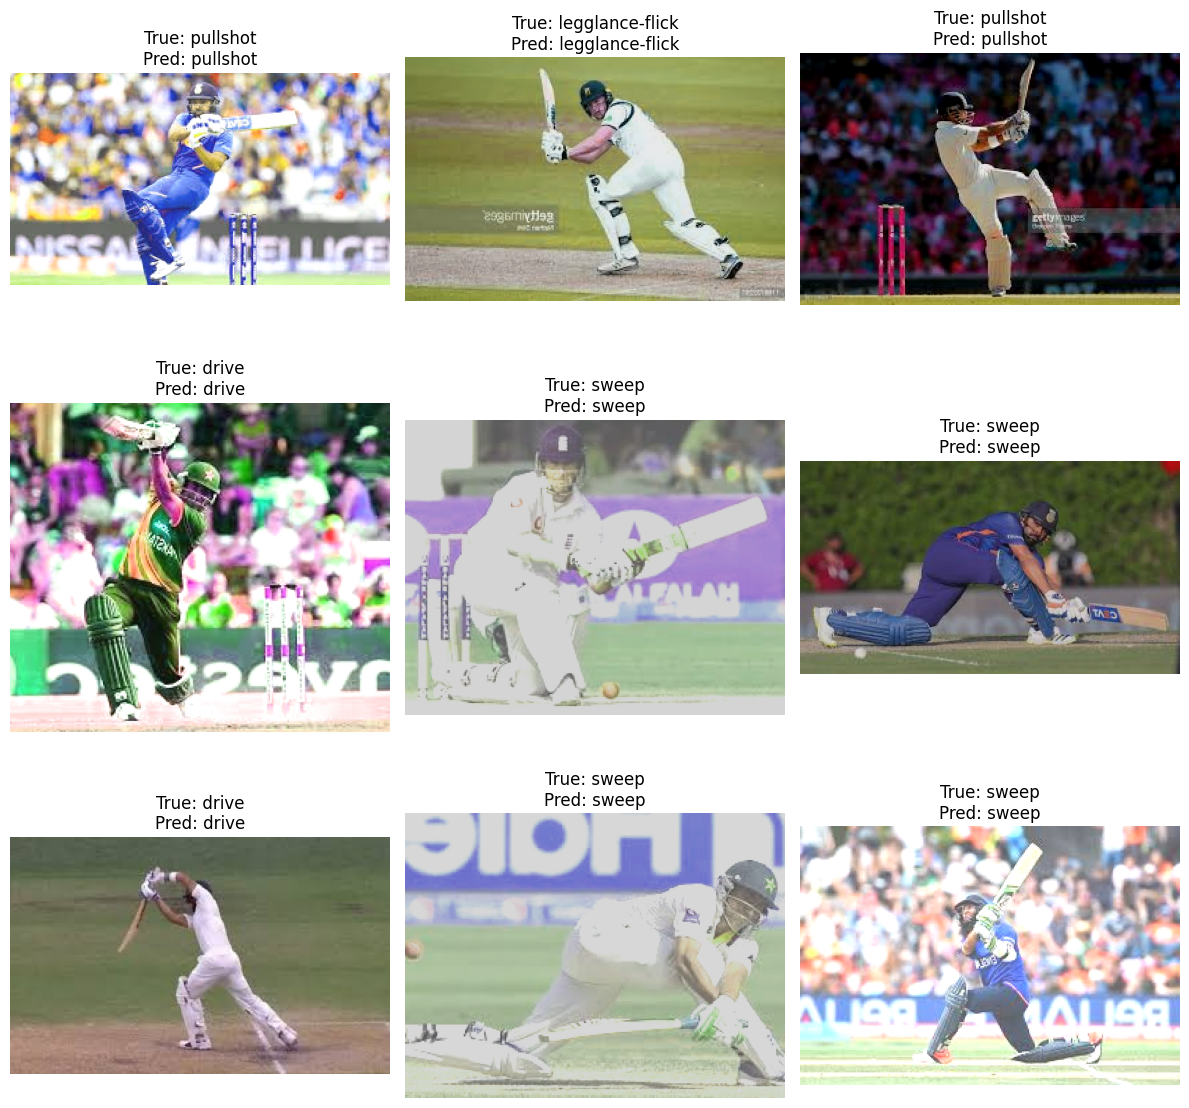

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os
import cv2
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Custom Dataset class
class CricketShotDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Function to load images from folder
def load_images_from_folder(folder_path):
    image_paths = []
    labels = []
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith(('jpg', 'jpeg', 'png')):
                    image_paths.append(file_path)
                    labels.append(subdir)
    return image_paths, labels

# Define transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load images and labels
dataset_path = 'data'  # Use the correct path to your data folder
image_paths, labels = load_images_from_folder(dataset_path)

# Convert labels to numeric values
label_to_idx = {label: idx for idx, label in enumerate(set(labels))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}
numeric_labels = [label_to_idx[label] for label in labels]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, numeric_labels, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = CricketShotDataset(train_paths, train_labels, transform=transform)
test_dataset = CricketShotDataset(test_paths, test_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
num_classes = len(set(labels))
model = SimpleCNN(num_classes)

# Print the model architecture
print(model)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

        # Calculate ETA
        elapsed_time = time.time() - start_time
        batches_left = len(train_loader) - (i + 1)
        eta = elapsed_time / (i + 1) * batches_left

        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, ETA: {eta:.2f} seconds')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print('Finished Training')

# Save the model
torch.save(model.state_dict(), 'simple_cnn_cricket_shot_model.pth')

# Evaluation on the test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred, target_names=[idx_to_label[i] for i in range(num_classes)])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:\n', report)

# Plotting some predictions
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for i in range(9):
    idx = random.randint(0, len(test_paths) - 1)
    img = cv2.imread(test_paths[idx])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    true_label = idx_to_label[test_labels[idx]]
    pred_label = idx_to_label[y_pred[idx]]
    axes[i].imshow(img_rgb)
    axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
